In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
import numpy as np

In [3]:
digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

In [4]:
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)

print('Уникальные спрогнозированные метки: {}'.format(
    np.unique(pred_most_frequent)))
print('Правильность на тестовом наборе: {:.2f}'.format(
    dummy_majority.score(X_test, y_test)))

Уникальные спрогнозированные метки: [False]
Правильность на тестовом наборе: 0.90


Dummy Classifier выдал правильность 0,9 без какого-либо обучения, так как предсказание мажоритарного класса "не девятка" было правильно в 90% случаев.

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, classification_report

In [6]:
tree = DecisionTreeClassifier(max_depth=18).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print('Правильность на тестовом наборе: {:.2f}'.format(
    tree.score(X_test, y_test)))

Правильность на тестовом наборе: 0.96


In [7]:
dummy = DummyClassifier(strategy='stratified').fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)

print('Правильность dummy: {:.2f}'.format(
    dummy.score(X_test, y_test)))

logreg = LogisticRegression(max_iter=1000).fit(X_train, y_train)
pred = logreg.predict(X_test)

print('Правильность Логистической регрессии: {:.7f}'.format(
    logreg.score(X_test, y_test)))

Правильность dummy: 0.82
Правильность Логистической регрессии: 0.9800000


In [8]:
confusion = confusion_matrix(y_test, pred)
print('Confusion matrix:\n{}'.format(confusion))

Confusion matrix:
[[400   3]
 [  6  41]]


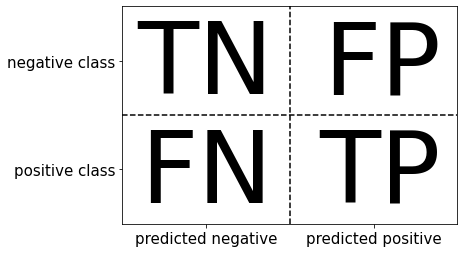

In [9]:
import mglearn

mglearn.plots.plot_binary_confusion_matrix()

In [10]:
print('Предсказание наиболее часто встречающегося класса:')
print(confusion_matrix(y_test, pred_most_frequent))
print('\nПредсказание Дамми-модели:')
print(confusion_matrix(y_test, pred_dummy))
print('\nПредсказание дерева решений:')
print(confusion_matrix(y_test, pred_tree))
print('\nПредсказание логистической регрессии:')
print(confusion_matrix(y_test, pred))

Предсказание наиболее часто встречающегося класса:
[[403   0]
 [ 47   0]]

Предсказание Дамми-модели:
[[367  36]
 [ 43   4]]

Предсказание дерева решений:
[[395   8]
 [ 12  35]]

Предсказание логистической регрессии:
[[400   3]
 [  6  41]]


In [11]:
print('f1-мера наибольшая частота: {:.2f}'.format(
    f1_score(y_test, pred_most_frequent)))
print('f1-мера Дамми: {:.2f}'.format(
    f1_score(y_test, pred_dummy)))
print('f1-мера дерево: {:.2f}'.format(
    f1_score(y_test, pred_tree)))
print('f1-мера Логистическая регрессия: {:.2f}'.format(
    f1_score(y_test, pred)))

f1-мера наибольшая частота: 0.00
f1-мера Дамми: 0.09
f1-мера дерево: 0.78
f1-мера Логистическая регрессия: 0.90


In [12]:
print(classification_report(y_test, pred_most_frequent, target_names=['not nine', 'nine'], zero_division=0))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



In [13]:
print(classification_report(
    y_test, pred, target_names=['not nine', 'nine'], zero_division=0))

              precision    recall  f1-score   support

    not nine       0.99      0.99      0.99       403
        nine       0.93      0.87      0.90        47

    accuracy                           0.98       450
   macro avg       0.96      0.93      0.94       450
weighted avg       0.98      0.98      0.98       450



In [24]:
from mglearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

In [18]:
X, y = make_blobs(n_samples=(400, 50), centers=2, cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)

C:\Program Files (x86)\Python3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


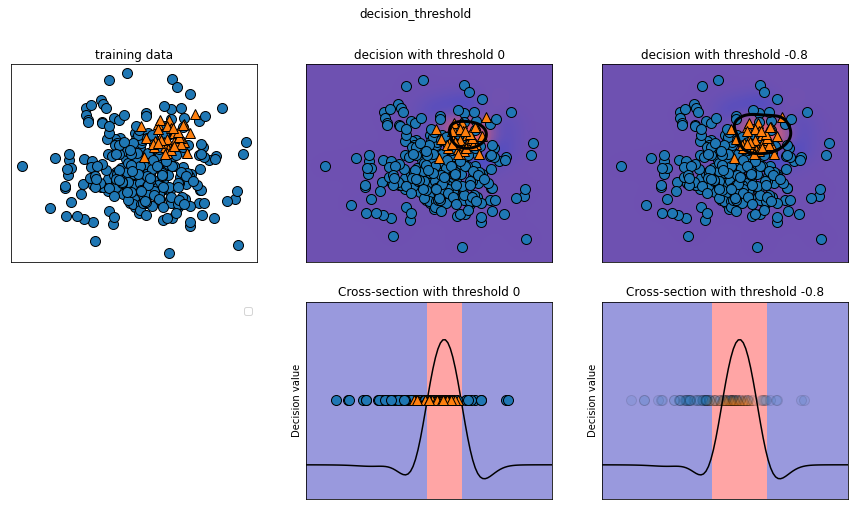

In [22]:
mglearn.plots.plot_decision_threshold()

In [20]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



In [21]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



In [23]:
precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))

C:\Program Files (x86)\Python3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


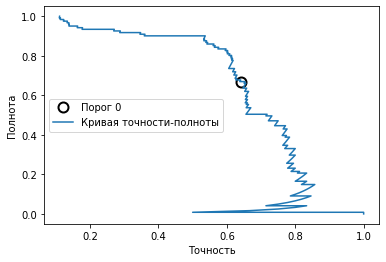

In [27]:
X, y = make_blobs(n_samples=(4000, 500), centers=2, cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))

close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
    label='Порог 0', fillstyle='none', c='k', mew=2)

plt.plot(precision, recall, label='Кривая точности-полноты')
plt.xlabel('Точность')
plt.ylabel('Полнота')
plt.legend(loc='best')

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import average_precision_score

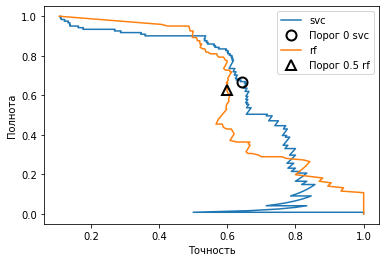

In [29]:
rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
    y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label='svc')

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
    label='Порог 0 svc', fillstyle='none', c='k', mew=2)

plt.plot(precision_rf, recall_rf, label='rf')

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k',
    markersize=10, label='Порог 0.5 rf', fillstyle='none', mew=2)
plt.xlabel('Точность')
plt.ylabel('Полнота')
plt.legend(loc='best')

При использовании только f1-меры была бы упущена из виду мера полноты прогноза:

In [30]:
print('f1-мера random forest: {:.3f}'.format(
    f1_score(y_test, rf.predict(X_test))))
print('f1-мера svc: {:.3f}'.format(f1_score(y_test, svc.predict(X_test))))

f1-мера random forest: 0.610
f1-мера svc: 0.656


In [32]:
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))

print('Средняя точность random forest: {:.3f}'.format(ap_rf))
print('Средняя точность svc: {:.3f}'.format(ap_svc))

Средняя точность random forest: 0.660
Средняя точность svc: 0.666


In [179]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Text(0.5, 1.0, 'ROC-кривая для SVM')

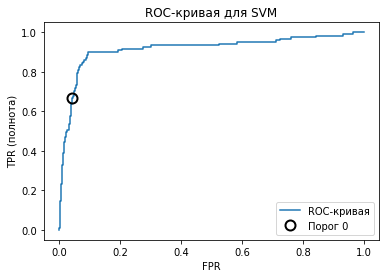

In [153]:
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label='ROC-кривая')
plt.xlabel('FPR')
plt.ylabel('TPR (полнота)')

close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
    label='Порог 0', fillstyle='none', c='k', mew=2)
plt.legend(loc='best')
plt.title('ROC-кривая для SVM')

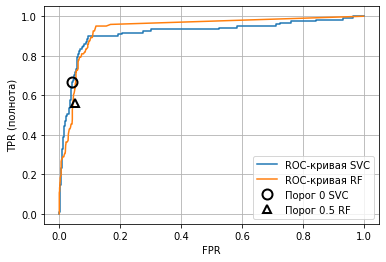

In [133]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label='ROC-кривая SVC')
plt.plot(fpr_rf, tpr_rf, label='ROC-кривая RF')

plt.xlabel('FPR')
plt.ylabel('TPR (полнота)')
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
    label='Порог 0 SVC', fillstyle='none', c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize=8,
    label='Порог 0.5 RF', fillstyle='none', c='k', mew=2)
plt.legend(loc='best')
plt.grid()

In [189]:
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))

print('AUC для случайного леса: {:.3f}'.format(rf_auc))
print('AUC для SVC: {:.3f}'.format(svc_auc))

AUC для случайного леса: 0.937
AUC для SVC: 0.916


gamma = 1.00; правильность = 0.90; AUC = 0.50
gamma = 0.05; правильность = 0.90; AUC = 1.00
gamma = 0.01; правильность = 0.90; AUC = 1.00


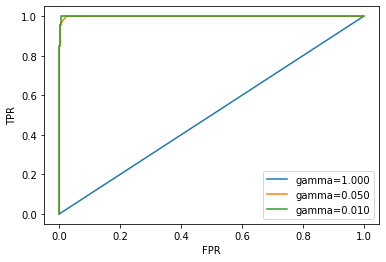

In [206]:
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

plt.figure()

for gamma in [1, 0.05, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test, svc.decision_function(X_test))
    print('gamma = {:.2f}; правильность = {:.2f}; AUC = {:.2f}'.format(
        gamma, accuracy, auc))
    plt.plot(fpr, tpr, label='gamma={:.3f}'.format(gamma))
plt.xlabel('FPR')
plt.ylabel('TPR')
#plt.xlim(-.01, 1)
#plt.ylim(0, 1.02)
plt.legend(loc='best')